In [19]:
import pandas as pd
import numpy as np

In [20]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
df.head().T
# transpose a dataframe

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [23]:
# replace column format to lower and if any space is there in name then replace with "_"
df.columns=df.columns.str.replace(' ','_').str.lower()

strings=list(df.dtypes[df.dtypes == 'object'].index)

for col in strings:
    df[col]=df[col].str.lower().str.replace(' ','_')

In [24]:
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [25]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [26]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [ ]:
pd.to_numeric(df.totalcharges)
# originally totalcharges column is declared as object/string however since its a numerical 
# column, converting to numeric

# Failed to convert to number as we replaced null value with underscore and underscore is treated as string.

ValueError: Unable to parse string "_" at position 488

In [ ]:
# handling null value error, add exception handling  
tc=pd.to_numeric(df.totalcharges,errors='coerce')
tc

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: totalcharges, Length: 7043, dtype: float64

In [29]:
df[tc.isnull()][['customerid','totalcharges']]

# due to data cleaning step which replaced null values with _, 
# this coloumn which should have been float got effected.

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


In [30]:
df.totalcharges=pd.to_numeric(df.totalcharges,errors='coerce')
df.totalcharges=df.totalcharges.fillna(0)
df[tc.isnull()][['customerid','totalcharges']]


,customerid,totalcharges
488,4472-lvygi,0.0
753,3115-czmzd,0.0
936,5709-lvoeq,0.0
1082,4367-nuyao,0.0
1340,1371-dwpaz,0.0
3331,7644-omvmy,0.0
3826,3213-vvolg,0.0
4380,2520-sgtta,0.0
5218,2923-arzlg,0.0
6670,4075-wkniu,0.0


In [ ]:
# since model understand only in numerical format, converting classification churn column to binary
# 1 is represented as churn true
# 0 is false
df.churn = (df.churn == "yes").astype(int)
df.churn.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

## validation framework
- split data

In [44]:
from sklearn.model_selection import train_test_split
df_full_train,df_test=train_test_split(df,test_size=0.2,random_state=1)
# full train = 80% , test =20%


In [45]:
df_train,df_val=train_test_split(df_full_train,test_size=0.25,random_state=1)

# val is 20% of full train which is 80% of complete data
# to get 20 % , test_size will be 0.25
# 20/80 ~ 0.25

In [46]:
print(len(df_train),len(df_test),len(df_val))

4225 1409 1409


In [47]:
df_train=df_train.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)


In [48]:
y_train=df_train.churn.values
y_test=df_test.churn.values
y_val=df_val.churn.values

In [49]:
del df_test['churn']
del df_train['churn']
del df_val['churn']

# Exploratory Data analysis (EDA)
- missing values
- target variable (churn)
- numerical and categorical variables

In [52]:
df_full_train=df_full_train.reset_index(drop=True)

In [53]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [ ]:
df_full_train.churn.value_counts()
# number of churn to use is 1:3

churn
0    4113
1    1521
Name: count, dtype: int64

In [ ]:
df_full_train.churn.value_counts(normalize=True)
# 0.26 is the churn rate


churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [58]:
global_churn_rate=df_full_train.churn.mean()
# same since its 1 and 0 .. so mean will be total count of 1 divided by total count 
round(global_churn_rate,2)

np.float64(0.27)

In [59]:
numerical = ['tenure','monthlycharges','totalcharges']


In [60]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [61]:
categorical= ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [64]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## Feature importance - churn rate and risk ratio
### feature importance analysis  - identify which features effects our target variable
- churn rate
- risk rate
- mutual information -later

In [65]:
# charn rate for each category

female_churn = df_full_train[df_full_train.gender == "female"].churn.mean()
female_churn

np.float64(0.27682403433476394)

In [ ]:
male_churn = df_full_train[df_full_train.gender == "male"].churn.mean()
male_churn

# it doesnt matter if gender is female or mail,
#  chrun rate doesnt matter as churn rate is almost similar to global chrun rate

np.float64(0.2632135306553911)

In [67]:
global_churn_rate

np.float64(0.26996805111821087)

In [69]:
df_full_train.partner.value_counts()

partner
no     2932
yes    2702
Name: count, dtype: int64

In [ ]:
churn_partner = df_full_train[df_full_train.partner == "yes"].churn.mean()
churn_partner
# churn rate is lesser then global chrun rate


np.float64(0.20503330866025166)

In [ ]:
churn_no_partner = df_full_train[df_full_train.partner == "no"].churn.mean()
churn_no_partner

# churn rate is more then global chrun rate

np.float64(0.3298090040927694)

# what we want to achieve  for each category - in sql
```sql

Select
    gender
    avg(churn),
    avg(churn) - global_churn as diff,
    avg(churn) / global_churn as risk
from 
    data
group by
    gender
```

In [77]:
df_group=df_full_train.groupby('gender').churn.agg(['mean','count'])
df_group

,mean,count
gender,,
female,0.276824,2796
male,0.263214,2838


In [79]:
df_group['diff'] = df_group['mean'] - global_churn_rate
df_group['risk'] = df_group['mean'] / global_churn_rate
df_group


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


In [80]:
from IPython.display import display

In [82]:
# looping over all categorical values to understand which features is 
# having direct and indirect relationship with target variable
# no relation with gender as the diff and risk is negligible 

for c in categorical:
    print(c)
    df_group=df_full_train.groupby(c).churn.agg(['mean','count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate
    display(df_group)
    print()
    print()


gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


# Feature importance : Mutual information
concept from information theory - it tells us how much we can learn about one variable
if we know the value of other variables

how much a vairable is important for model to predict target value
-  Mutual info score is used for catergorical values


In [83]:
from sklearn.metrics import mutual_info_score

In [84]:
mutual_info_score(df_full_train.churn,
df_full_train.contract)

0.0983203874041556

In [85]:
mutual_info_score(df_full_train.churn,
df_full_train.gender)

0.0001174846211139946

In [ ]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [ ]:
mi=df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)
# which variables are usefull for us.

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

# Feature importance : correlation
- Numerical values
- correlation coefficients 
 - degree of dependency between 2 variables

```text
    X is how dependent on y

    -1 <= r <= 1
    r is correlation

   Negative correlation -  if value of x grows, leads to decrease value of y 
   Positive correlation -- if value of x grows , grows value of y.

   y is between 0 to 1
   x can be anythin - infitiny to + infinity

```
   ### Low/Rare correlation

   0 to 0.2  --> very rarely increase y value
  -0.2 to 0  

  ### moderate/sometime correlation
    
    0.2 to 0.5
    -0.2 to -0.5

 ### strong/ often correlation

    0.6 to 1.0
    -0.6 to -1.0

In [91]:
df_full_train[numerical]

,tenure,monthlycharges,totalcharges
0,12,19.70,258.35
1,42,73.90,3160.55
2,71,65.15,4681.75
3,71,85.45,6300.85
4,30,70.40,2044.75
...,...,...,...
5629,9,100.50,918.60
5630,60,19.95,1189.90
5631,28,105.70,2979.50
5632,2,54.40,114.10


In [ ]:
df_full_train[numerical].corrwith(df_full_train.churn)

# Negative coeeficient .. 
# when tenure increase less likely to churn
# the people pay, less likely to leave
# Positve
# higher the monthly charges, more likely people leaves.


tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [ ]:
df_full_train[df_full_train.tenure <= 2].churn.mean()
# in this group churn rate is very high

np.float64(0.5953420669577875)

In [96]:
df_full_train[df_full_train.tenure >= 2].churn.mean()


np.float64(0.23594631394670298)

In [98]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12) ].churn.mean()


np.float64(0.3994413407821229)

In [ ]:
df_full_train[df_full_train.tenure >= 12].churn.mean()

# As tenure increase less likely of churn


np.float64(0.17986881937436933)

In [ ]:
# As monthly charges increase more likely of churn
print("less then 20", df_full_train[df_full_train.monthlycharges <= 20].churn.mean())
print("more then 20, less then 50", df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean())
print("more then 50", df_full_train[df_full_train.monthlycharges >= 20].churn.mean())


less then 20 0.08795411089866156
more then 20, less then 50 0.18340943683409436
more then 50 0.28715756751505733


### correlation between tenure, monthly charges and churn 
- As tenure increase less likely of churn  -- Negative Correlation 
-  As monthly charges increase more likely of churn -- Positive Correlation

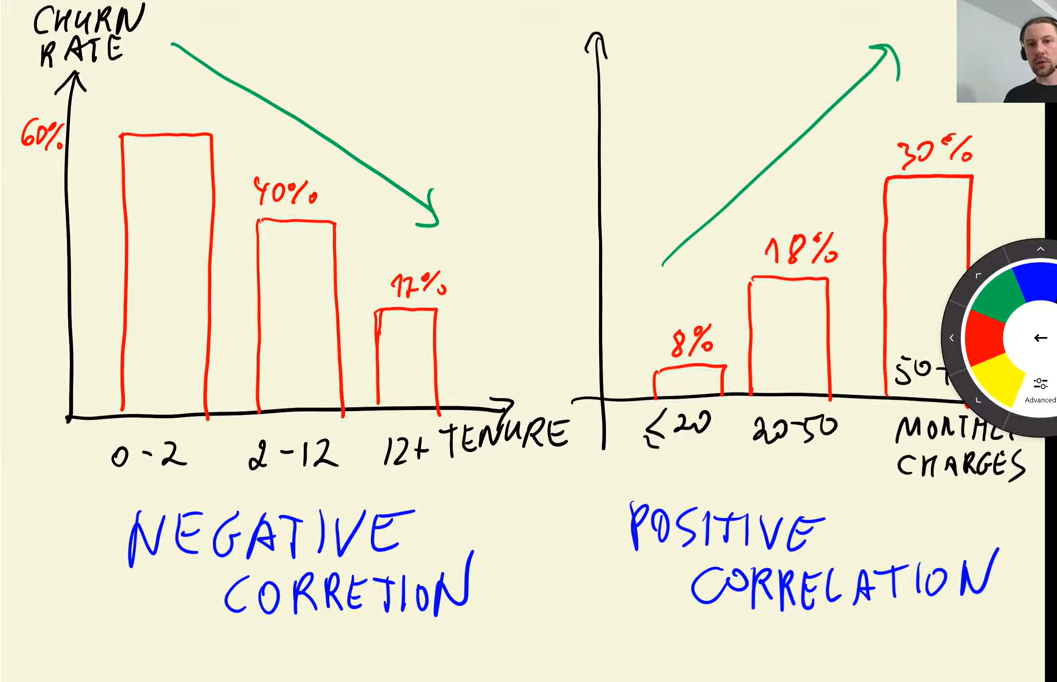

In [103]:
df_full_train[numerical].corrwith(df_full_train.churn).abs()
# order of importance

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64